In [15]:
#Code to get the tweeter data, get the url, copy the pin and paste here.
import tweepy
import webbrowser
import time
cosumer_key = "vQOWNASyo8XuilBewBdKISyVE"
consumer_secret = "TCJeRSk2R1HpK0Fx3PDrYfvuezuGUYLfG7yiwtYjykcTskIysF"
callback_url = 'oob' # URL : https://
auth = tweepy.OAuthHandler(cosumer_key, consumer_secret, callback_url)
redirect_url = auth.get_authorization_url()
print(redirect_url)
webbrowser.open(redirect_url)
user_pin_input = input("What's the pin number? ")
user_pin_input
auth.get_access_token(user_pin_input)
print(auth.access_token, auth.access_token_secret)
api = tweepy.API(auth)
me = api.me()
print(me.screen_name)

https://api.twitter.com/oauth/authorize?oauth_token=aLlKggAAAAABOBRfAAABeSpXGgw
What's the pin number? 9632874
422268986-l2D9HR2hQg0nS9ZQmKiLVCAeFG7iiLKpUCGuFbNq FNcBeD3b1fsa9HGHg7DOwVsuVKQIP6QiONU7CeH5y5MIK
Rakesh_Singh01


In [16]:
#Get the tweeter data for any of the company and store line by line code into a variable/file
import nltk
import pandas as pd
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
stock='Gamestop'
q=stock
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
#Code to get limited nymber of tweets
tweets = tweepy.Cursor(api.search,
                   q='Gamestop',
                   lang="en",
                   since='2020-11-01').items(2000)

#print(type(tweets))
# Remove URLs
#Blank dataframe to store results
df1 = pd.DataFrame()


tweets_list = []
score_list=[]
prediction_list=[]

#Get each tweet and analyze the sentiment
for tweet in tweets:
    if (not tweet.retweeted) and ('RT @' not in tweet.text):
        sen=SentimentIntensityAnalyzer()
        sa=sen.polarity_scores(tweet.text)
        print(sa)
        '''
        if sa["pos"] > sa["neg"]:
            prediction = "Positive"
            score = prediction+":" +str(sa["pos"])
        else:
            prediction = "Negative"
            score = prediction+ ":"+str(sa["neg"])'''
        #Logic for Buy,sell, Hold : If Positive=Buy, Negative=Sell, Neutral=Hold
        if sa["compound"]>= 0.05:
            prediction="Positive"
            score = prediction+":" +str(sa["compound"])
            
        elif sa["compound"]<= -0.05:
            prediction="Negative"
            score = prediction+":" +str(sa["compound"])
        else:
            prediction="Neutral"
            score = prediction+":" +str(sa["compound"])
        
        #print(sa)
        #mod = sa + tweet.text
        score_list.append(score)
        #tweets_list.append(sa)
        tweets_list.append(tweet.text)
        prediction_list.append(prediction)
        
        #Store each tweets sentiment score in a dataframe
        df1 = df1.append(pd.Series([score,tweet.text,prediction,tweet.created_at,q],index=['Score','Tweet','Prediction','CreatedDate','CompanyName']), ignore_index=True)
        

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rakeshmac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.3818}
{'neg': 0.218, 'neu': 0.677, 'pos': 0.105, 'compound': -0.4588}
{'neg': 0.2, 'neu': 0.702, 'pos': 0.098, 'compound': -0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.296}
{'neg': 0.194, 'neu': 0.721, 'pos': 0.086, 'compound': -0.5267}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.088, 'neu': 0.84, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.3595}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.217, 'neu': 0.699, 'pos': 0.084, 'compound': -0.5859}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.3321}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.2748}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'compound': -0.1027}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.093, 'neu': 0.806, 'pos': 0.10

{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'compound': 0.4836}
{'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.3182}
{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.6696}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6696}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.212, 'neu': 0.577, 'pos': 0.212, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos

In [17]:
df1.to_csv(r'GSTOP.csv'.format(pd.datetime.today().strftime('%y%m%d-%H%M%S')), mode='a', header=False)
print(df1)

    CompanyName         CreatedDate Prediction             Score  \
0      Gamestop 2021-05-01 23:47:17    Neutral       Neutral:0.0   
1      Gamestop 2021-05-01 23:47:01    Neutral       Neutral:0.0   
2      Gamestop 2021-05-01 23:46:04    Neutral       Neutral:0.0   
3      Gamestop 2021-05-01 23:45:42   Positive    Positive:0.296   
4      Gamestop 2021-05-01 23:45:26   Positive   Positive:0.3818   
..          ...                 ...        ...               ...   
342    Gamestop 2021-05-01 19:40:49   Negative  Negative:-0.4215   
343    Gamestop 2021-05-01 19:39:43   Positive   Positive:0.5837   
344    Gamestop 2021-05-01 19:38:46   Positive   Positive:0.4404   
345    Gamestop 2021-05-01 19:38:38   Positive   Positive:0.7455   
346    Gamestop 2021-05-01 19:38:33    Neutral       Neutral:0.0   

                                                 Tweet  
0    @TherealPyra I was at a gamestop one day and s...  
1    @MalikLabz @mcquack306 @AndreaPichinini Tell t...  
2    @Crypto

<ipython-input-17-2d9a14ef9f02>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df1.to_csv(r'GSTOP.csv'.format(pd.datetime.today().strftime('%y%m%d-%H%M%S')), mode='a', header=False)


In [22]:
# Calculate the average of prediction to display the result
#df1 = pd.read_csv(r'GSTOP.csv')
cntPrediction=df1['Prediction'].count()
print(cntPrediction)

347


In [23]:
cntPositive=list(df1.Prediction).count('Positive')
cntNegative=list(df1.Prediction).count('Negative')
cntNeutral=list(df1.Prediction).count('Neutral')
percentPositive=(cntPositive/cntPrediction)*100
percentNegative=(cntNegative/cntPrediction)*100
percentNeutral=(cntNeutral/cntPrediction)*100
print("Buy%  = ", percentPositive)
print("Sell% = ", percentNegative)
print("Hold% = ", percentNeutral)

Buy%  =  34.293948126801155
Sell% =  22.19020172910663
Hold% =  43.51585014409222


In [92]:
# Download the helper library from https://www.twilio.com/docs/python/install
import os
from twilio.rest import Client


# Your Account Sid and Auth Token from twilio.com/console
# and set the environment variables. See http://twil.io/secure
#account_sid = os.environ['AC2021d083d53ba956203c588ab4ff9c9b']
#auth_token = os.environ['66f965a306e5f153bca93d0bcf44e014']
account_sid = 'AC2021d083d53ba956203c588ab4ff9c9b'
auth_token = '66f965a306e5f153bca93d0bcf44e014'
client = Client(account_sid, auth_token)
analysis = 'Stock='+str(q) + ' Buy%='+ str(percentPositive) + ' Sell%=' + str(percentNegative) + ' Hold%=' + str(percentNeutral)
#body = 'Buy=%d Sell=%d Hold=%d'
message = client.messages.create(
                              body=analysis,
                              from_='+13142549333',
                              to='+12024289119'
                          )

print(message.sid)
print(message)

SM3f2e5e247c0741a1ba82cd9ee84967b9
<Twilio.Api.V2010.MessageInstance account_sid=AC2021d083d53ba956203c588ab4ff9c9b sid=SM3f2e5e247c0741a1ba82cd9ee84967b9>


In [28]:
#Create a dataframe to plot graphs
df_graph=pd.DataFrame([[q,percentPositive,percentNegative,percentNeutral]],columns=['CompanyName','Buy','Sell','Hold'])
print(df_graph)

  CompanyName        Buy       Sell      Hold
0    Gamestop  34.293948  22.190202  43.51585


<AxesSubplot:>

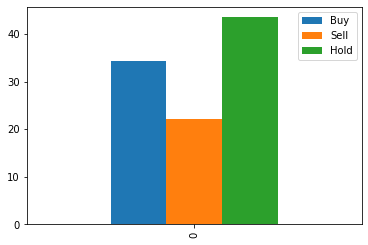

In [34]:
df_graph.plot.bar()